In [5]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import ipywidgets as widgets
from galvo_controller import GalvoScannerController
from main import ScanningMicroscope
import json
import time
import live_plot
# Set up matplotlib for inline plotting
%matplotlib inline

## Microscope initialization

In [6]:
# Initialize the microscope
microscope = GalvoScannerController()
print("Microscope initialized successfully!")

Successfully initialized DAQ connection
Microscope initialized successfully!


## Set microscope to (0,0)

In [7]:
microscope.close()

## Live photon count
This cell provides real-time monitoring of photon counts from the single-photon detector (SPD). The visualization updates every 0.1 seconds and displays the last 100 data points.


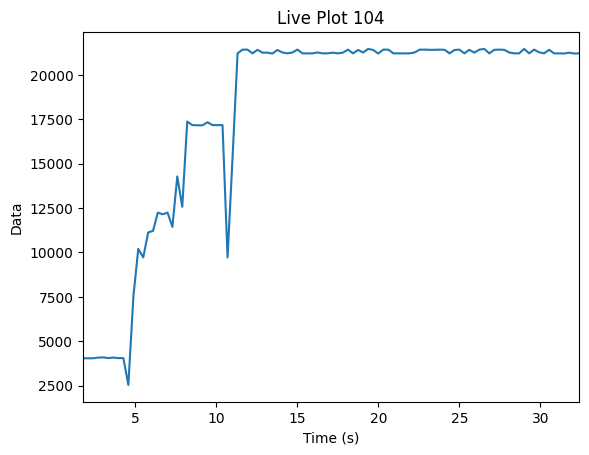

In [8]:


def measure_photons():
    try:
        # Read photon counts for 0.1 seconds
        counts = microscope.read_spd_count(sampling_time=0.1)
        # Convert to counts per second
        return counts * 10  # Multiply by 10 since we sampled for 0.1s
    except Exception as e:
        print(f"Error reading photon counts: {str(e)}")
        return 0


live_plot.live_plot(
            measure_function=measure_photons,
            histogram_range=100,  # Show last 100 points
            dt=0.1  # Update every 0.1 seconds
        )

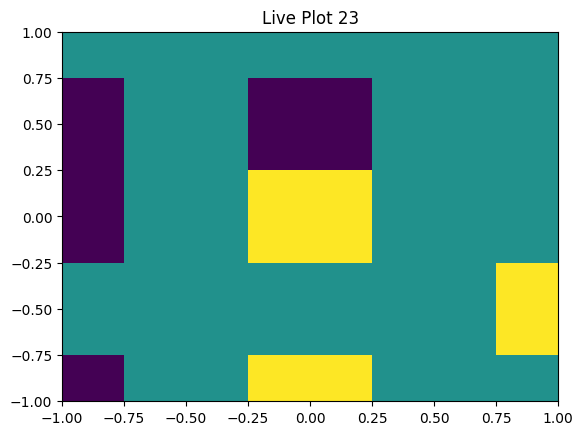

In [3]:

config = {
    "scan_range": {
        "x": [-1.0, 1.0],
        "y": [-1.0, 1.0]
    },
    "resolution": {
        "x": 5,
        "y": 5
    },
    "dwell_time": 0.1,
    "scan_mode": "realtime",
    "hardware": {
        "sample_rate": 1000,
        "samples_per_point": 10,
        "settling_time": 0.001
    },
    "visualization": {
        "colormap": "viridis",
        "update_interval": 50
    }
} 

def setup_scan(config):
        """Set up scan parameters based on configuration."""
        try:
            x_range = config['scan_range']['x']
            y_range = config['scan_range']['y']
            x_res = config['resolution']['x']
            y_res = config['resolution']['y']
            
            x_points = np.linspace(x_range[0], x_range[1], x_res)
            y_points = np.linspace(y_range[0], y_range[1], y_res)
            
            return x_points, y_points
        except Exception as e:
            print(f"Error setting up scan: {str(e)}")
            raise

x_points, y_points = setup_scan(config)

live_plot.live_plot(
            measure_function=lambda: microscope.scan_pattern(x_points, y_points, config['dwell_time']),
            histogram_range=100,  # Show last 100 points
            dt=0.1
        )